In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
print(tf.__version__)

2.1.0


In [4]:
fashion_mnist= keras.datasets.fashion_mnist

In [5]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [6]:
class_names= ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandel',
              'Shirt','Sneaker','Bag','Ankle boot']

In [7]:
train_images.shape

(60000, 28, 28)

In [8]:
len(train_labels)

60000

In [9]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [10]:
test_images.shape

(10000, 28, 28)

In [11]:
len(test_labels)

10000

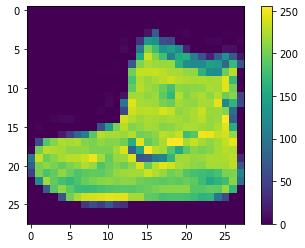

In [12]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [13]:
train_images=train_images/255.0
test_images=test_images/255.0

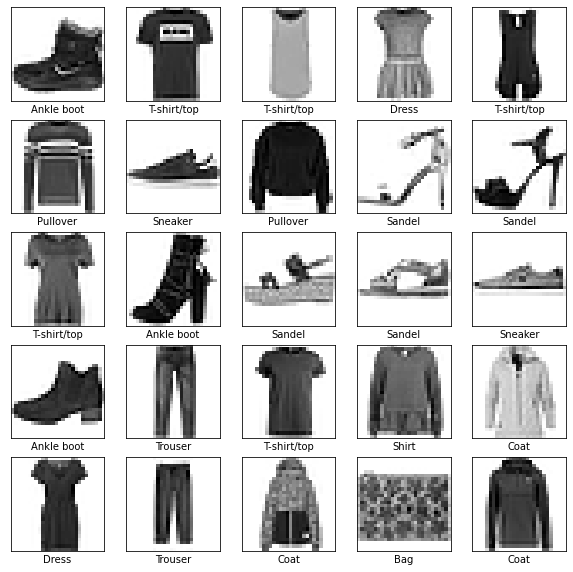

In [14]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap= plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [15]:
model= keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128,activation=tf.nn.relu),
    keras.layers.Dense(10,activation=tf.nn.softmax)
])

In [16]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [17]:
model.fit(train_images,train_labels,epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 5s 87us/sample - loss: 0.4989 - accuracy: 0.8257
Epoch 2/10
60000/60000 [==============================] - 4s 68us/sample - loss: 0.3764 - accuracy: 0.8648
Epoch 3/10
60000/60000 [==============================] - 4s 69us/sample - loss: 0.3390 - accuracy: 0.8765
Epoch 4/10
60000/60000 [==============================] - 5s 87us/sample - loss: 0.3115 - accuracy: 0.8845
Epoch 5/10
60000/60000 [==============================] - 4s 71us/sample - loss: 0.2939 - accuracy: 0.8913
Epoch 6/10
60000/60000 [==============================] - 4s 67us/sample - loss: 0.2800 - accuracy: 0.8956
Epoch 7/10
60000/60000 [==============================] - 4s 67us/sample - loss: 0.2674 - accuracy: 0.9021
Epoch 8/10
60000/60000 [==============================] - 4s 72us/sample - loss: 0.2560 - accuracy: 0.9043
Epoch 9/10
60000/60000 [==============================] - 4s 70us/sample - loss: 0.2462 - accuracy: 0.9079
Epoch 10/10
60

In [18]:
test_loss,test_acc= model.evaluate(test_images,test_labels)
print('Test accuracy',test_acc)

10000/10000 [==============================] - 1s 52us/sample - loss: 0.3387 - accuracy: 0.8810
Test accuracy 0.881


In [19]:
predictions= model.predict(test_images)

In [20]:
predictions[0]

array([2.16928555e-07, 1.22300685e-08, 2.42548506e-08, 6.56860095e-08,
       1.64766405e-08, 4.39171446e-04, 7.49526691e-07, 2.53163697e-03,
       3.17484728e-06, 9.97024953e-01], dtype=float32)

In [21]:
np.argmax(predictions[0])

9

In [22]:
test_labels[0]

9

In [23]:
def plot_image(i,predictions_array, true_label, img):
    predictions_array,true_label,img= predictions_array[i],true_label[i],img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap= plt.cm.binary)
    
    predicted_label= np.argmax(predictions_array)
    if predicted_label== true_label:
        color= 'blue'
    else:
        color= 'red'
    
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                        100*np.max(predictions_array),
                                        class_names[true_label]),
                                        color=color)
    
def plot_value_array(i,predictions_array,true_label):
    predictions_array,true_label= predictions_array[i],true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10),predictions_array, color="#777777")
    plt.ylim([0,1])
    predicted_label= np.argmax(predictions_array)
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('green')

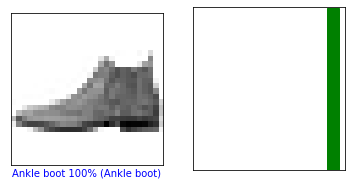

In [24]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i,predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i,predictions,test_labels)
plt.show()

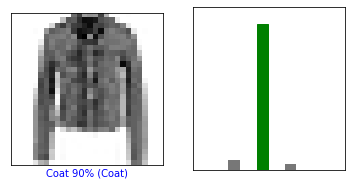

In [25]:
i = 10
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i,predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i,predictions,test_labels)
plt.show()

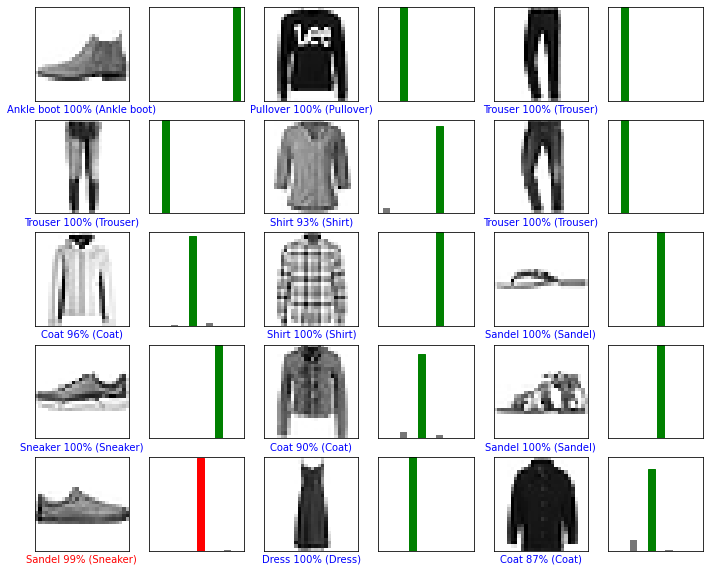

In [26]:
num_rows= 5
num_cols= 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows,2*num_cols, 2*i+1)
    plot_image(i,predictions,test_labels,test_images)
    plt.subplot(num_rows,2*num_cols, 2*i+2)
    plot_value_array(i,predictions,test_labels)
plt.show()

In [27]:
img= test_images[0]
print(img.shape)

(28, 28)


In [28]:
img=(np.expand_dims(img,0))
print(img.shape)

(1, 28, 28)


In [29]:
predictions_single= model.predict(img)

print(predictions_single)

[[2.16928768e-07 1.22300685e-08 2.42548506e-08 6.56860095e-08
  1.64766725e-08 4.39171039e-04 7.49527430e-07 2.53163557e-03
  3.17484432e-06 9.97024953e-01]]


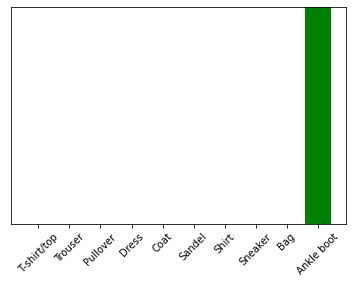

In [30]:
plot_value_array(0,predictions_single,test_labels)
_=plt.xticks(range(10),class_names,rotation=45)

In [31]:
np.argmax(predictions_single[0])

9